wisesight-sentiment sentiment analysis


In [ ]:
!pip install pythainlp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This notebook perform an exploration of the wisesight-sentiment dataset which was provided by Wisesight (Thailand) Co., Ltd. It contains 24,063 texts with 4 categories (question, negative, neutral, and positive) for training set and 2,674 texts for test set
Word length distribution
Tokenization
Pos-tagging
Lemmtization
Words
Emojis

In [ ]:
import re

import pandas as pd


from pathlib import Path

from pythainlp.tokenize import word_tokenize
from tqdm import tqdm_notebook

# For visualization
import seaborn as sns

from matplotlib import pyplot as plt

# params
pd.set_option("max_colwidth", 0)
sns.set_context("talk")
sns.set_palette(sns.color_palette("colorblind", 10))

%matplotlib inline
import nltk
nltk.download('punkt') # Download necessary resources
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Thai font is needed
# Copy thsarabunnew-webfont.ttf to the notebook directory

# snippet to install Thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

#matplotlib.font_manager._rebuild()
matplotlib.rc("font", family="TH Sarabun New")

# Reading data

In [ ]:
# Set data path
data_folder = Path("/content/dataset")

In [ ]:
# Open the file for reading
with open('/content/dataset/test.txt', 'r') as file:
    # Read the contents of the file into a string variable
    text = file.read()

In [ ]:
# Tokenize the text into words
tokens = nltk.word_tokenize(text)# Tokenize the text into words



In [ ]:
# Perform POS tagging on the tokens
pos_tags = nltk.pos_tag(tokens)

print(pos_tags)

[('ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ', 'JJ'), ('แบบว่าอีห่ากูนอนไม่ได้', 'NNP'), ('ครับ', 'NNP'), ('#', '#'), ('phithanbkk', 'NN'), ('การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ', 'NN'), ('แต่บีทีเอส', 'NNP'), ('(', '('), ('รถไฟฟ้า', 'NNP'), (')', ')'), ('มันสำนึกมั้ย', 'VBP'), ('ก็ไม่อ่ะ', 'JJ'), ('😕', 'NNP'), ('Cf', 'NNP'), ('clarins', 'VBZ'), ('5', 'CD'), ('ขวด', 'NN'), ('2850', 'CD'), ('ทานได้ค่ะ', 'NNP'), ('น้ำซุป', 'NNP'), ('MK', 'NNP'), ('ต้มมาจากหัวผักกาด', 'NNP'), ('ซีอิ้วขาว', 'NNP'), ('เกลือ', 'NNP'), ('แลน้ำตาลค่ะ', 'NNP'), ('เคล็ดลับที่ขาดไม่ได้ในการป้องกันผิวจากแสงแดด', 'NNP'), ('คือการทาครีมกันแดด', 'NNP'), ('สาวๆบ้างคนอาจจะคิดว่ามันไม่ใช่เรื่องสำคัญเท่าไหร่', 'NNP'), ('แต่บอกเลยว่า', 'NNP'), ('ผิดมาก', 'NNP'), ('เพราะแสงแดดสมัยนี้แรงมาก', 'NNP'), ('และมีอนุภาพการทำลายผิวสูงมาก', 'NNP'), ('ถ้าไม่อยากให้ผิวเราถูกทำร้ายแบบซ้ำๆซาก', 'NNP'), ('ควรทาครีมกันแดดที่ดีมีคุณภาพอย่าง', 'NNP'), ('Eucerin', 'NNP'), ('Sun', 'NNP'), ('Age', 'NNP'), ('Repair', 'NNP'), ('Serum', 'NNP'), ('ปัจจุบันค

In [ ]:
# Open the file for reading
with open('/content/dataset/train.txt', 'r') as file:
    # Read the contents of the file into a string variable
    text2 = file.read()

In [ ]:
# Tokenize the text into words
tokens = nltk.word_tokenize(text2)# Tokenize the text into words

In [ ]:
# Perform POS tagging on the tokens
pos_tags = nltk.pos_tag(tokens)

print(pos_tags)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)

In [ ]:
lemmas = []
for token, tag in pos_tags:
    if tag.startswith('NN'):
        lemma = lemmatizer.lemmatize(token, pos='n')
    elif tag.startswith('VB'):
        lemma = lemmatizer.lemmatize(token, pos='v')
    elif tag.startswith('JJ'):
        lemma = lemmatizer.lemmatize(token, pos='a')
    else:
        lemma = token
    lemmas.append(lemma)

In [ ]:
lemmatized_text = ' '.join(lemmas)
print(lemmatized_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tokens = word_tokenize(text)

print(tokens)

['ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ', 'แบบว่าอีห่ากูนอนไม่ได้', 'ครับ', '#', 'phithanbkk', 'การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ', 'แต่บีทีเอส', '(', 'รถไฟฟ้า', ')', 'มันสำนึกมั้ย', 'ก็ไม่อ่ะ', '😕', 'Cf', 'clarins', '5', 'ขวด', '2850', 'ทานได้ค่ะ', 'น้ำซุป', 'MK', 'ต้มมาจากหัวผักกาด', 'ซีอิ้วขาว', 'เกลือ', 'แลน้ำตาลค่ะ', 'เคล็ดลับที่ขาดไม่ได้ในการป้องกันผิวจากแสงแดด', 'คือการทาครีมกันแดด', 'สาวๆบ้างคนอาจจะคิดว่ามันไม่ใช่เรื่องสำคัญเท่าไหร่', 'แต่บอกเลยว่า', 'ผิดมาก', 'เพราะแสงแดดสมัยนี้แรงมาก', 'และมีอนุภาพการทำลายผิวสูงมาก', 'ถ้าไม่อยากให้ผิวเราถูกทำร้ายแบบซ้ำๆซาก', 'ควรทาครีมกันแดดที่ดีมีคุณภาพอย่าง', 'Eucerin', 'Sun', 'Age', 'Repair', 'Serum', 'ปัจจุบันครีมกันแดดมีมากมายให้เราเลือกซื้อก็จริง', 'แต่ก็อย่าลืมเลือกสิ่งที่ดีที่สุดให้ตัวเราอย่าง', 'Eucerin', 'Sun', 'Acne', 'oil', 'Control', 'ค่ะ', 'สำหรับสูตรของผม', 'คือ', 'Jack', 'Daniel', "'s", 'หวานซ่อนเปรี้ยวชื่อ', 'Jack', 'Yellow', 'Life', 'ส่วนประกอบ', 'Jack', 'Daniel', "'s", '2', 'ชอท', 'น้ำเก๊กฮวย', 'น้ำมะนาว', 'ใบมิ้นท์', 'เกลือเล็ก

In [ ]:
# Generate _train.csv from traint.txt and train_label.txt
texts = []
labels = []

with open(data_folder/"train.txt") as f:
    for line in f:
        texts.append(line.strip())

with open(data_folder / "train_label.txt") as f:
    for line in f:
        labels.append(line.strip())

df = pd.DataFrame({ "category": labels, "texts": texts })
del texts
del labels

df.to_csv("_train.csv", index=False)
df.shape

(24063, 2)

In [ ]:
# Generate _test.csv from test.txt, use "neu" as the only class
texts = []
labels = []

with open(data_folder / "test.txt") as f:
    for line in f:
        texts.append(line.strip())

test_df = pd.DataFrame({ "category": "neu", "texts": texts })
del texts
del labels

test_df.to_csv("_test.csv", index=False)
test_df.shape

(2674, 2)

In [ ]:
df.describe()

,category,texts
count,24063,24063
unique,4,24014
top,neu,#ERROR!
freq,13105,31


In [ ]:
df.groupby("category").describe()

texts         \
          count unique   
category                 
neg       6140   6129    
neu       13105  13087   
pos       4300   4300    
q         518    518     

                                                                                       \
                                                                                  top   
category                                                                                
neg       #ERROR!                                                                       
neu       #ERROR!                                                                       
pos       สนใจ ฟอจูนเนอร์ สีขาวครับ                                                     
q         นิสสัน suv ที่เพิ่งเปิดตัวที่ฟิลิบปินส์เป็นไงบ้างครับ สมรรถภาพ มาไทยเมื่อไร   

               
         freq  
category       
neg       12   
neu       19   
pos       1    
q         1

# Text length

In [ ]:
df["length"] = df["texts"].apply(word_tokenize).apply(len)
df.head()

,category,texts,length
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,1
1,neu,คะ,1
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,1
3,neu,😅😅😅,1
4,neu,สวัสดีวันพุธ แนน อะไรนะ,3


<Axes: >

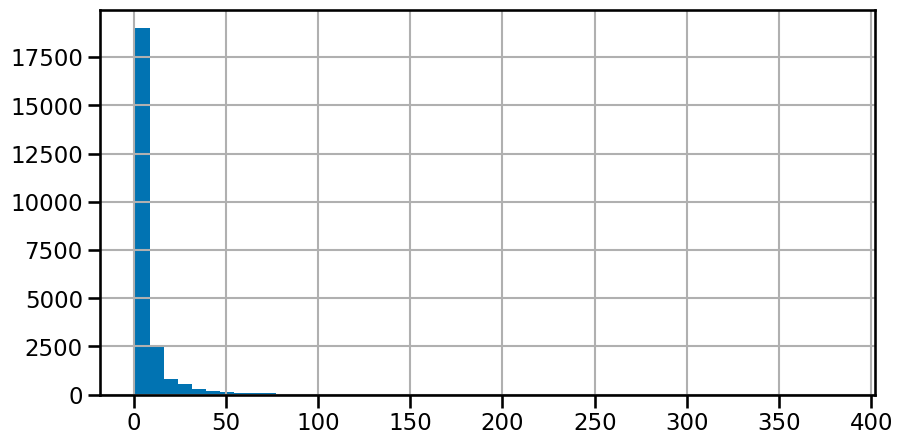

In [ ]:
df["length"].hist(bins=50, figsize=(10, 5))

In [ ]:
df["length"].describe()

count    24063.000000
mean     7.527781    
std      15.430124   
min      1.000000    
25%      1.000000    
50%      3.000000    
75%      7.000000    
max      383.000000  
Name: length, dtype: float64

In [ ]:
df[df["length"] >= 749]

,category,texts,length


### Word length distribution


### Word length distribution (< 100)

*   List item
*   List item

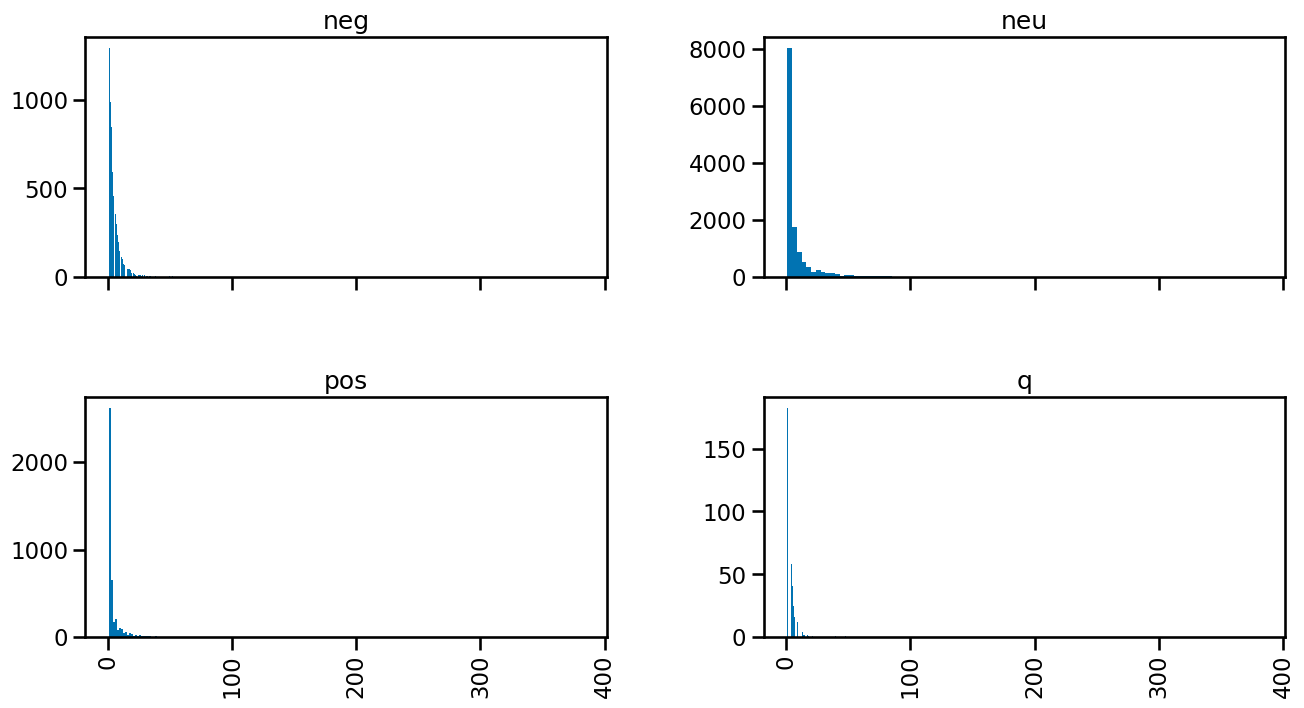

In [ ]:
df.hist(column="length", by="category", bins=100, figsize=(15,8), sharex=True)
plt.show()

In [ ]:
def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ["feature", "score"]

    return df

In [ ]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''

    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)

    return top_feats(tfidf_means, features, top_n)

In [ ]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''

    dfs = []
    labels = np.unique(y)

    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)

    return dfs

In [ ]:
def plot_classfeats_h(dfs, score_name=''):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))

    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel(f"Mean {score_name} Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)

    plt.show()

In [ ]:
def show_classfeats(df, vectorizer, analyzer, score_name='', text_col='texts', class_col='category', is_emoji=False):
    vec = vectorizer(analyzer=analyzer)
    mat = vec.fit_transform(df[text_col])
    dfs = top_feats_by_class(mat, df[class_col], vec.get_feature_names())

    if is_emoji:
        for dataframe in dfs:
            dataframe.columns = [dataframe.label, 'tfidf_' + dataframe.label]
        return pd.concat(dfs, axis=1)
    else:
        plot_classfeats_h(dfs, score_name=score_name)

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=670fac29394db044045c880045ef8e67d0c9be927ac2012a8e97888f79020909
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import string
import emoji
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in word_tokenize(nopunc) if word and not re.search(pattern=r"\s+", string=word)]

def extract_url(text):
    URL_PATTERN = r"(https?:\/\/)?\.([\da-z-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S"
    return [url[1] for url in re.findall(pattern=URL_PATTERN, string=text.lower())]

def extract_emojis(str):
    return [c for c in str if c in emoji.UNICODE_EMOJI]

def extract_punc(text):
    return [char for char in text if char in string.punctuation]

def extract_hashtags(text):
    HASHTAG_PATTERN = r"#[a-zA-Z0-9ก-๙]+"
    return re.findall(pattern=HASHTAG_PATTERN, string=text)

In [ ]:
neu_df = df[df.category == "neu"].sample(5000)
neu_df.head()

,category,texts,length
5814,neu,ยังไม่ลืม! ศรีสุวรรณ ขยี้ไม่รอ ลุยต่อสอบโต๊ะจีนพลังประชารัฐ ชี้ผิดโทษหนัก!,7
21503,neu,เห็นเมื่อ หลายปีก่อน ฮอนด้า ซื้อรถกลับจริงครับ ฝ่ายการตลาดเขาไม่ยอม ให้ทำ แท๊กซี่,7
11785,neu,มู๋ตังกุว่าแวะเอ็มเค นางคงมักเป็ดมากกว่าปู,2
9046,neu,รถมิตซูบิซิในดวงใจคีอ มิตซูบิชิ ปาเจโร สปอร์ต,4
13458,neu,สายควันอยู่ยากไปสายเขียวดีกว่า😀😀😀,1


In [ ]:
pos_df = df[df.category == "pos"]
pos_df.head()

,category,texts,length
10,pos,สนใจ ฟอจูนเนอร์ สีขาวครับ,3
16,pos,ไปดิ..รอไร,3
19,pos,อยากกินบาบีก้อนหรอ555555,1
22,pos,ต้องไปลองกันนะ,1
25,pos,ขอให้ SHEENe มีกิจการรุ่งเรือง ขายดีๆ ยอดไลท์เพจเยอะๆ มีสินค้าคุณภาพออกมาให้ผู้บริโภคมากๆ ให้ SHEENeดูแลคนไทยไปตลอดไปครับ,8


In [ ]:
neg_df = df[df.category == "neg"]
neg_df.head()

,category,texts,length
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,1
6,neg,เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีนานๆไปเเย่ขึ้นเรื่อยๆกากกว่าเน็ตค่ายอื่นอ่ะบอกจริงไม่สนหรอกว่าจะเป็นเด็กเเล้วเม้นด่าเเบบนี้ เเต่นี้หาตังค์จ่ายค่าเน็ตมาตลอดเหนื่อยน่ะเล่นเกมส์ไปเดี่ยวก็หายกากเกินติดตั้งโปรพิเศษ100Mเเต่พอวัดดูปล่อยไม่ถึงเท่าที่ตกลงกันไว้พอโทรไปเเจ้งก็ปล่อยมาเต็มไม่กี่วันก็เหมื่อนเดิมใบเเจ้งก็มาย้อนหลัง3เดือนทุกครั้งห่วยไปน่ะบางทีโปร100M/700 กว่าบาทเเต่คุณภาพเเย่เสียดายตังค์,3
8,neg,เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ,2
11,neg,ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ราคาสามารถเอื้อมถึงได้ #LASHESactivity,8
12,neg,ทำไมมันไม่มีโปรให้เร๊าาาาาา,1


In [ ]:
sentiment_df = pd.concat([neg_df, pos_df, neu_df])
sentiment_df = sentiment_df.reset_index(drop=True)
sentiment_df.groupby("category").texts.describe()

,count,unique,top,freq
category,,,,
neg,6140,6129,#ERROR!,12
neu,5000,4989,#ERROR!,12
pos,4300,4300,สนใจ ฟอจูนเนอร์ สีขาวครับ,1


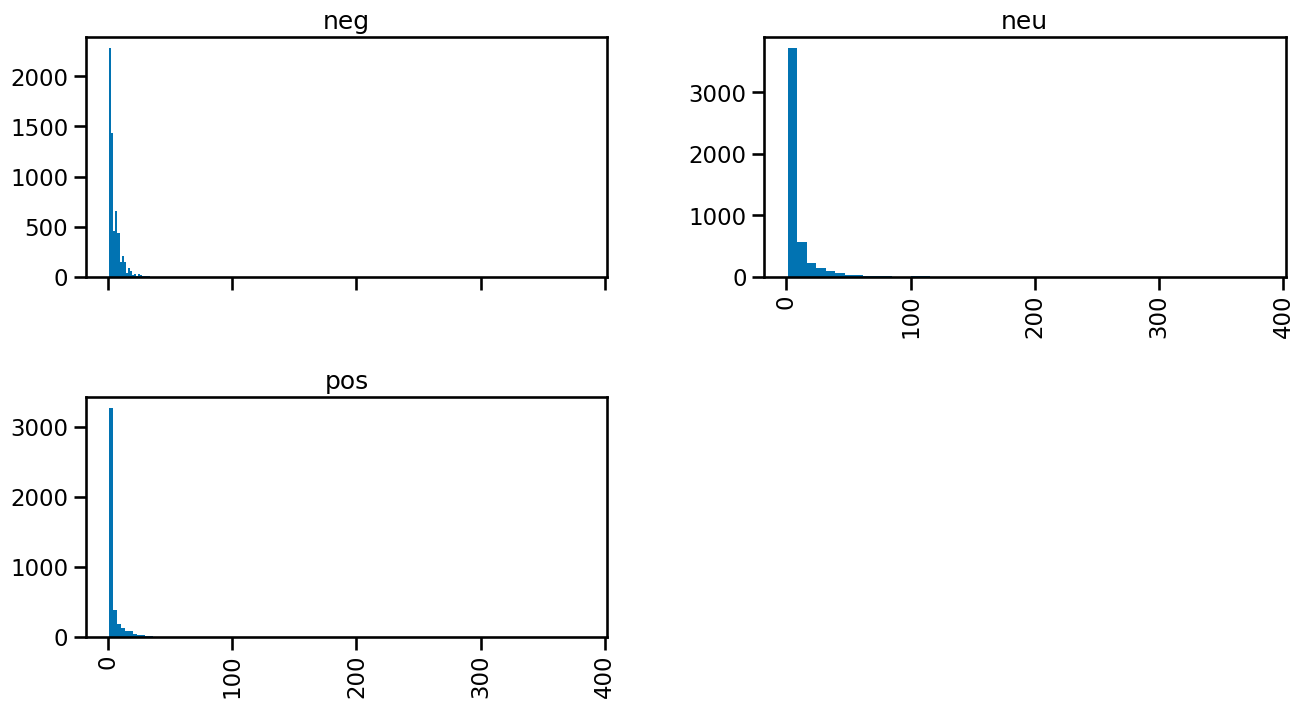

In [ ]:
sentiment_df.hist(column="length", by="category", bins=50, figsize=(15, 8), sharex=True)
plt.show()

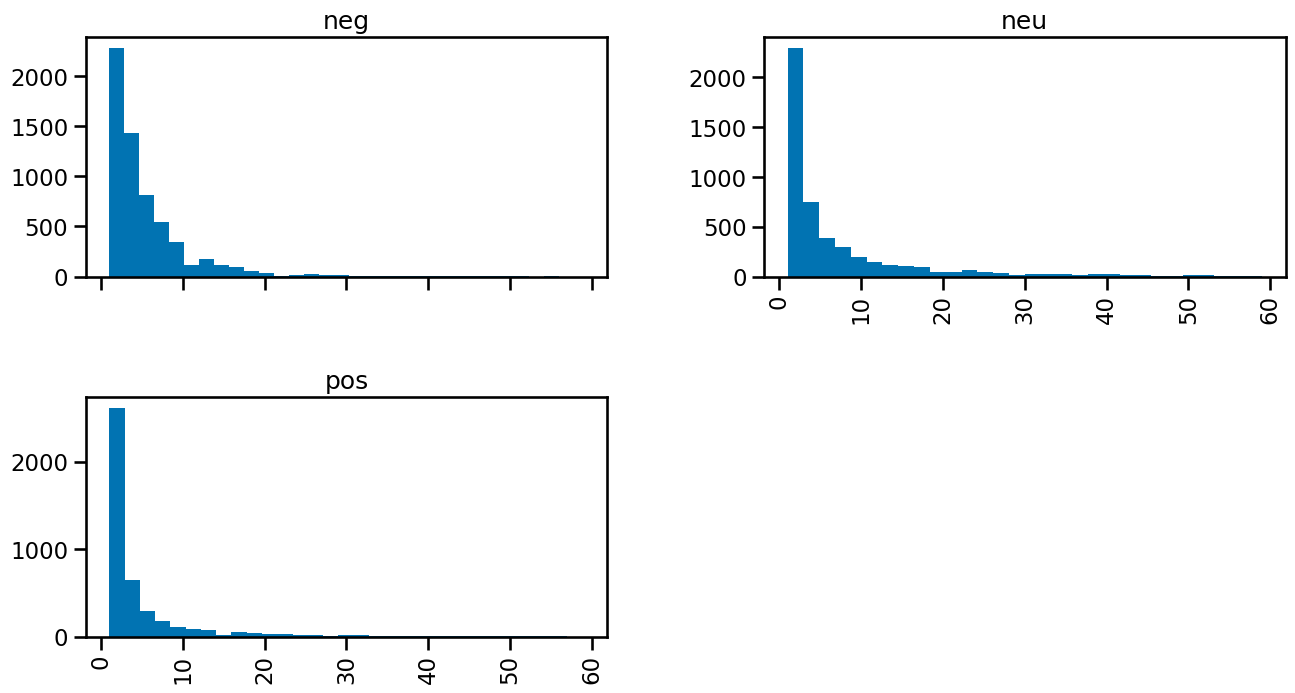

In [ ]:
sentiment_df[sentiment_df.length < 60].hist(column="length", by="category", bins=30, figsize=(15, 8), sharex=True)
plt.show()

# Classification

---



In [ ]:
class_names = np.unique(sentiment_df.category).tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentiment_df["texts"], sentiment_df["category"], test_size=0.20, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2))),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB(alpha=0.001)),
])

text_clf.fit(X_train, y_train)
text_clf.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.5003238341968912

## Multinomial Naive Bayes (default parameters)


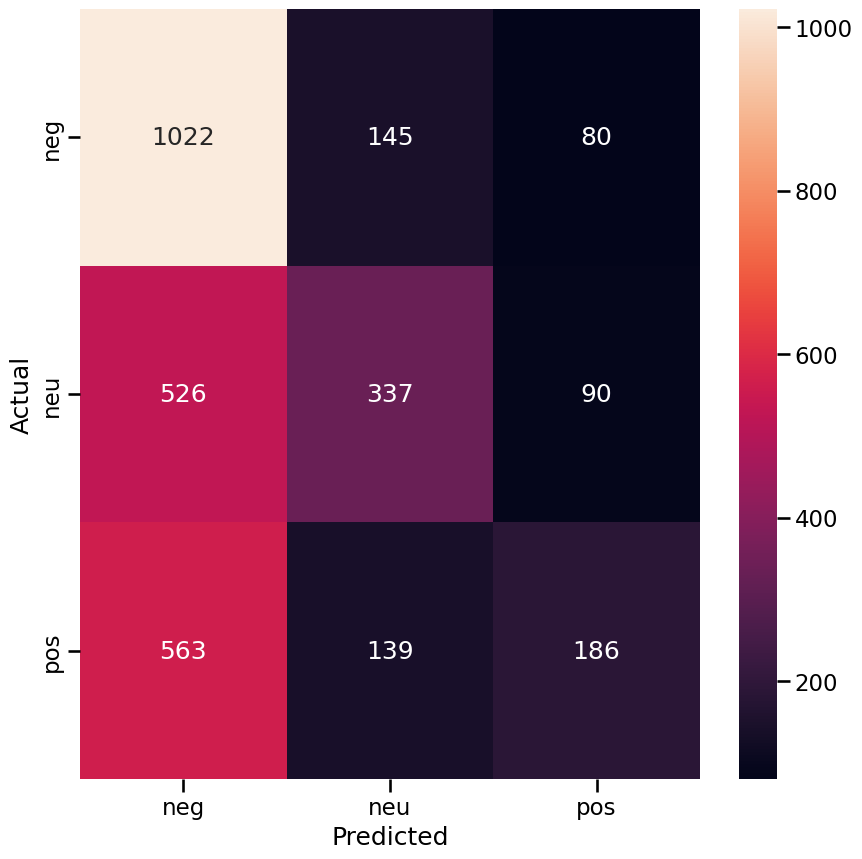

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, text_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svc_clf = Pipeline([
    ("vect", CountVectorizer(tokenizer=process_text, ngram_range=(1,2))),
    ("tfidf", TfidfTransformer()),
    ("clf", LinearSVC()),
])

svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.49870466321243523

## Linear SVC (default parameters)

*   List item
*   List item

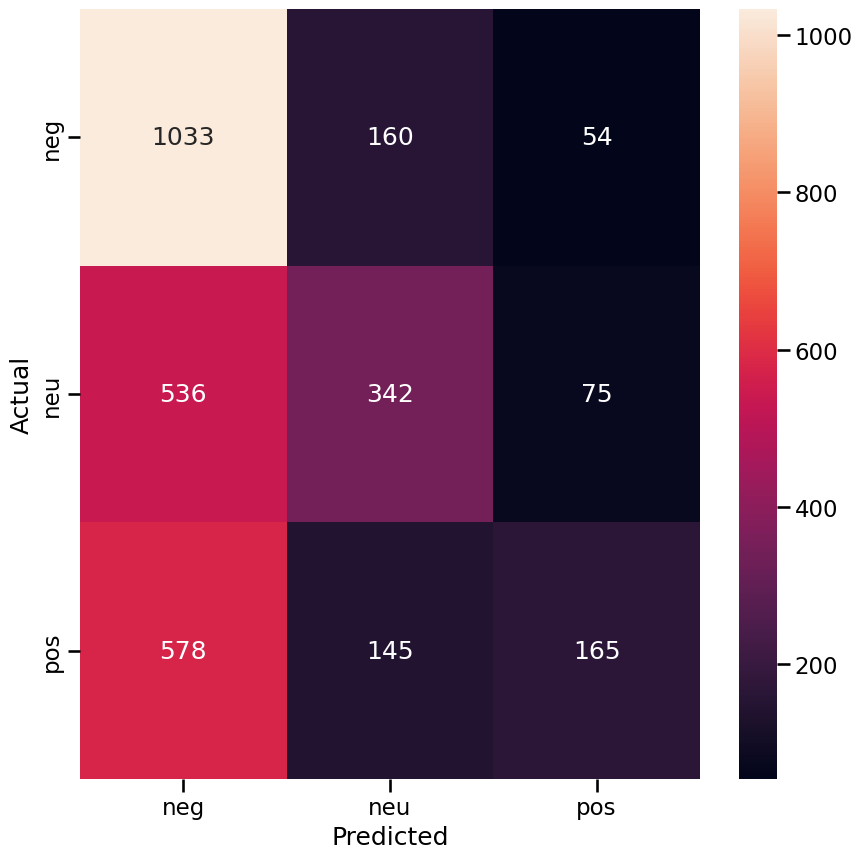

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, svc_clf.predict(X_test))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()